In [30]:
%load_ext autoreload
%autoreload 2

import torch
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset, random_split

import scanpy as sc
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import pandas as pd
import numpy as np
from src.data import read_dataset, normalize
from train_model import get_model, train_model


FILE_PATH = "data/sim_scdata_2_groups_ndo.csv"
USE_RAW_OUTPUT: bool = False
BATCH_SIZE: int = 32
VAL_SPLIT: float = 0.2
DEVICE = 'mps'
EPOCHS: int = 300
MODEL_TYPE: str = 'zinb'
LR: float = 1e-3
ENCODER_SIZES: list[int] = [64]  # Hidden layer sizes for encoder, [size_layer1, size_layer2, ...]
DECODER_SIZES: list[int] = [64]  # Hidden layer sizes for decoder, [size_layer1, size_layer2, ...]
BOTTLNECK_SIZE: int = 32  # Size of bottleneck layer
DROPOUT_RATE: float = 0.1  # Dropout rate for encoder and decoder

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [31]:
df = pd.read_csv(FILE_PATH, index_col=0)
groups = pd.Categorical(df["cell_group_2"]).codes
df = df.drop(columns=["cell_group_2"])
X = df.values
print(X.shape)

(100, 200)


(100, 2)


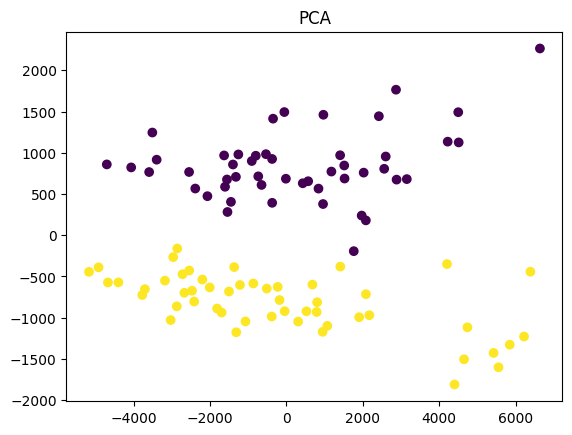

In [32]:
# PCA
pca = PCA(n_components=2)
pca.fit(X)

X_pca = pca.transform(X)
print(X_pca.shape)

#group_colors = ["red" if group == "Group1" else "blue" for group in groups]

plt.scatter(X_pca[:, 0], X_pca[:, 1], c=groups)
plt.title("PCA")
plt.show()

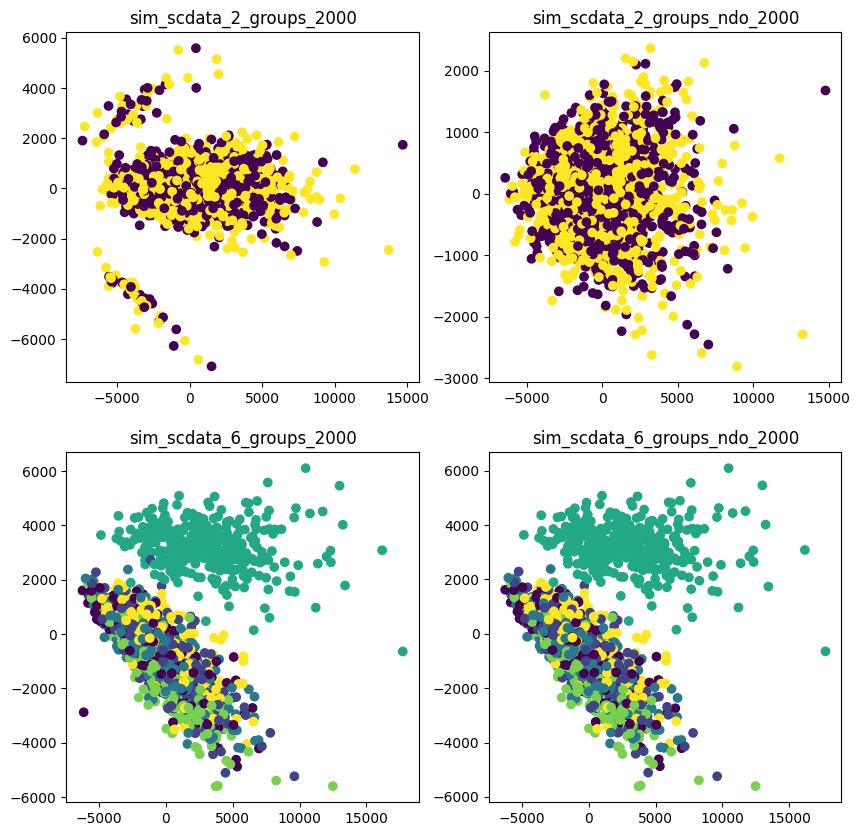

In [33]:
files = [
    {"name": "sim_scdata_2_groups_2000", "groups": "cell_groups_1_2000"},
    {"name": "sim_scdata_2_groups_ndo_2000", "groups": "cell_group_2_2000"},
    {"name": "sim_scdata_6_groups_2000", "groups": "cell_group_3"},
    {"name": "sim_scdata_6_groups_ndo_2000", "groups": "cell_group_4"},
]

fig, ax = plt.subplots(2, 2, figsize=(10, 10))

for i, file in enumerate(files):
    df = pd.read_csv(f"data/{file['name']}.csv", index_col=0)
    groups = pd.Categorical(df[file["groups"]]).codes
    df = df.drop(columns=[file["groups"]])
    X = df.values

    pca = PCA(n_components=2)
    pca.fit(X)

    X_pca = pca.transform(X)

    ax[i // 2, i % 2].scatter(X_pca[:, 0], X_pca[:, 1], c=groups)
    ax[i // 2, i % 2].set_title(file["name"])